Estudiante: Maldonado Aguilar Angel Julian.

# Análisis de regresión lineal

En este proyecto se hará uso del modelo de regresión lineal simple para estimar el consumo de cerveza en la ciudad de Sao Paulo a partir de la temperatura máxima registrada en un día.


### 1. Tabla de datos con la variable predictora y la de respuesta.

In [15]:
# Se crea un dataframe a partir de los datos de un archivo.
data <- read.csv("consumo_cerveja_SaoPaulo.csv")
head(data)

,TemperaturaMaxima,Consumodecerveja
,<dbl>,<dbl>
1,32.5,25.461
2,33.5,28.972
3,29.9,30.814
4,28.6,29.799
5,28.3,28.900
6,30.5,28.218


In [16]:
str(data)

'data.frame':	365 obs. of  2 variables:
 $ TemperaturaMaxima: num  32.5 33.5 29.9 28.6 28.3 30.5 33.7 32.8 34 34.2 ...
 $ Consumodecerveja : num  25.5 29 30.8 29.8 28.9 ...


Se puede observar de la salida anterior que el conjunto de datos proporcionados cuenta con 365 observaciones, ademas de tener solo 2 variables que representan la temperatura, que será nuestra variable predictora y el consumo de cerveza, que será la variable de respuesta.

### 2. Exploración de ambas variables. 

Se hara uso de las variables `x` y `y` para representar la temperatura máxima y el consumo de cerveza respectivamente, con tal de simplicar la escritura del código posterior.

In [17]:
x <- data$TemperaturaMaxima
y <- data$Consumodecerveja

#### Variable predictora (x): Temperatura en grados centigrados.

In [18]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.50   23.80   26.90   26.61   29.40   36.50 

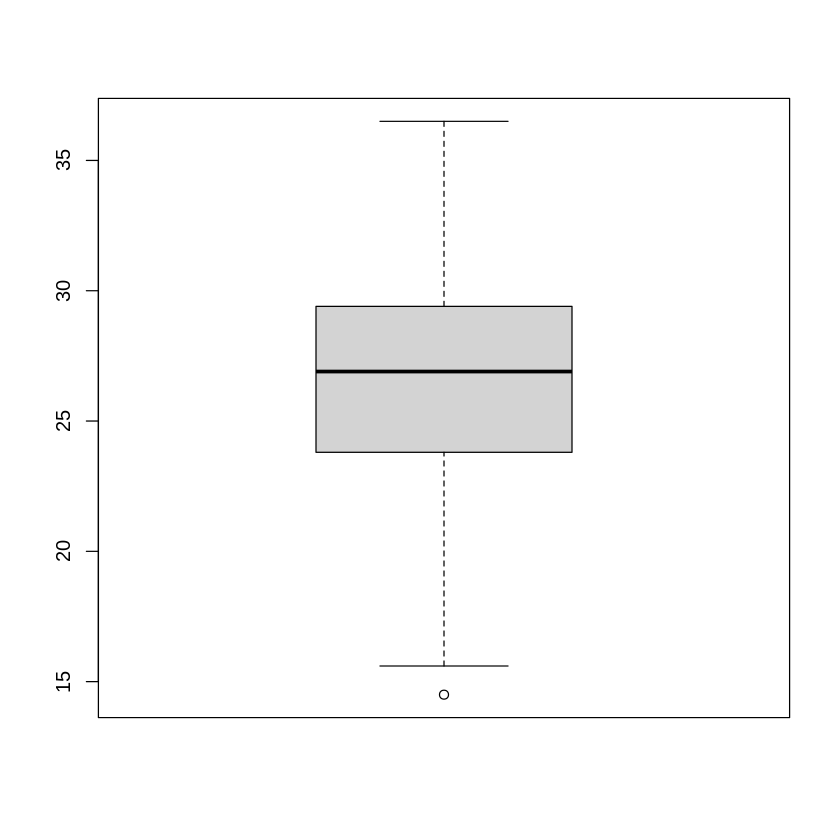

In [19]:
boxplot(x)

De la exploración anterior para la variable predictora que representa la temperatura, podemos observar que hubo un mínimo de 14.5 °C, un máximo de 36.5 °C y una media de 26.6 °C, es decir fue un día algo caluroso el registrado en la ciudad de Sao Paulo. 

A su vez el diagrama de cajas nos muestra que las temperaturas registradas centrales se encuentran ligeramente mas hacia la temperatura máxima que a la mínima. Por otra parte vemos que hay un valor atipico en una temperatura baja.

#### Variable de respuesta (y): Consumo de cerveza en miles de litros.

In [20]:
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.34   22.01   24.87   25.40   28.63   37.94 

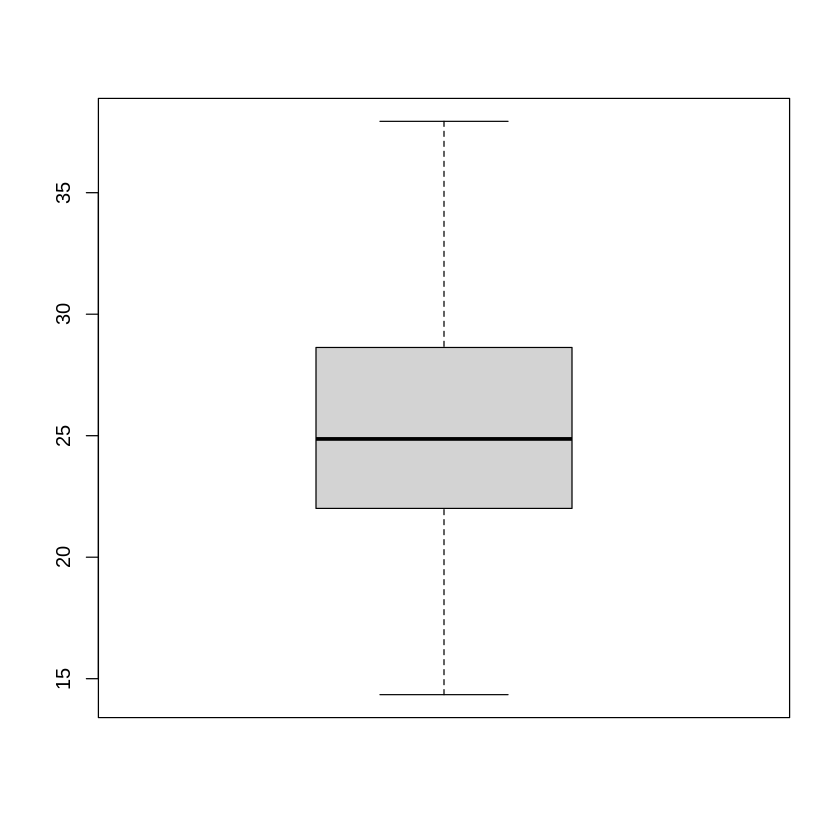

In [21]:
boxplot(y)

De la observación anterior para la variable de respuesta que representa el consumo de cerveza en miles de litros (Kl), podemos observar que hubo un mínimo de 14.3 Kl, un máximo de 37.9 Kl, un rango entre los dos anteriores valores no tan grande. También se observa una media de 25.9 KL, un valor casi en el centro dentro del conjunto de datos registrados.

Para este variable se puede observar en el diagrama de cajas que no hay algún valor atípico.

### 3. Gráfica de dispersión y medidas de asociación.

#### Gráfica de dispersión.

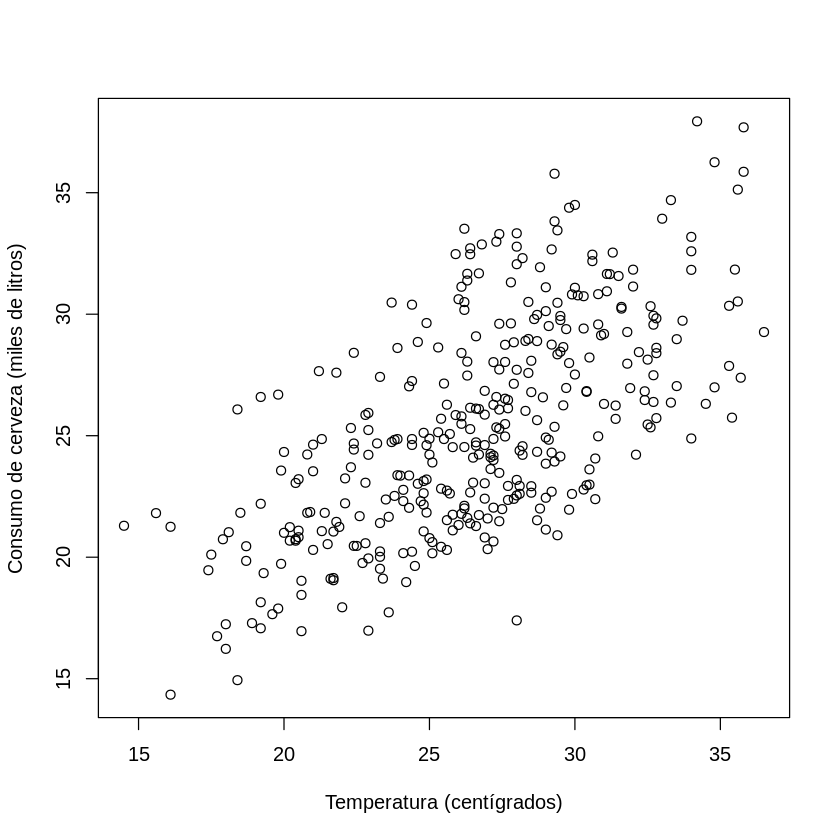

In [22]:
plot(x, y, 
    xlab = "Temperatura (centígrados)", 
    ylab = "Consumo de cerveza (miles de litros)")

La gráfica de dispersión muestra que la nube de puntos tiende a seguir una linea recta ascendente, con puntos algo dispersos, lo que nos puede ir dando la idea que el coeficiente de determinación que más adelante se va a calcular no será tan cercano a 1 pero si significativo.

#### Medidas de asociación.

Podemos utilizar el coeficiente de correlación lineal que cuantifica la intensidad de la relación lineal entre la variable X y Y, cuyo rango va de [-1, 1]. En R podemos obtener este valor con la funcion `cor(x, y)`.



In [23]:
cor(x, y)

[1] 0.6426725

El coeficiente de correlación obtenido de 0.64 (redondeado) nos indica una correlación lineal levemente fuerte entre la variable predictora y la variable de respuesta. Ademas al ser positivo el valor nos indica que la correlación es positiva, lo cual podemos confirmar con la grafica de dispersión previamente dibujada.

### 4. Ajuste del modelo de regresión lineal simple para explicar el consumo de cerveza  en función de la temperatura máxima. 



Dado que lo que se desea es **explicar** el consumo de cerveza en función de la temperatura en lugar de hacer predicciones, entonces es conveniente para este caso utilizar un **modelo generativo.**

Donde los coeficientes de los estimadores son calculados con las siguientes formulas:

\begin{align}
    \widehat{\alpha_0}^{ML} &= \widehat{\alpha_0}^{LS} = \frac{Cov(x,y)}{Var(x)} \\
    \widehat{\alpha_1}^{ML} &= \widehat{\alpha_1}^{LS} = \overline{y}- \widehat{\alpha_1}^{LS}\overline{x}\\
\end{align}

In [24]:
a1 <- cov(x,y) / var(x)
a0 <- mean(y)- a1*mean(x)

print(a0)
print(a1)

[1] 7.974939
[1] 0.6548456


Modelo a partir de los estimadores calculados:
\begin{align}
y = 7.9749 + 0.6548x
\end{align}

Lo que es equivalente a:

\begin{align}
\text{Consumo de cerveza [Kl]} = 7.9749 + 0.6548 * Temperatura [°C]
\end{align}


Gráfica de dispersión con el módelo de regresión lineal obtenido.

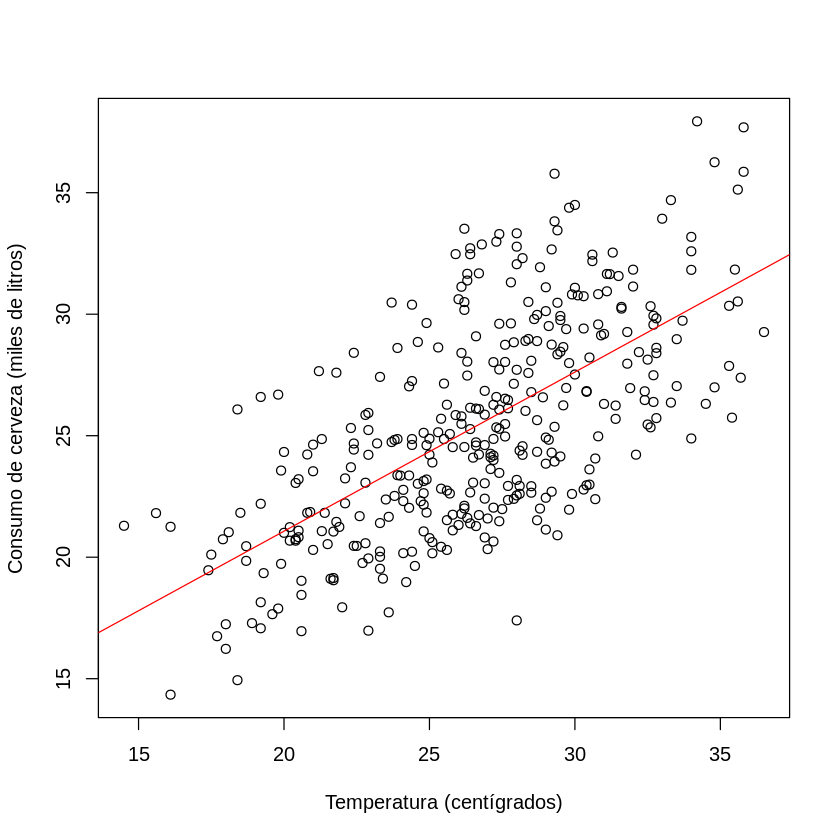

In [25]:
plot(x, y,
    xlab = "Temperatura (centígrados)", 
    ylab = "Consumo de cerveza (miles de litros)")
abline(a0, a1, col="red")

En la gráfica podemos observar la linea recta que mejor se ajusta a la nube de puntos, donde la suma de los errores al cuadrado es la mínima. 

En R, podemos utilizar la función `lm(...)` y `summary(...)` para conseguir información relevante de un modelo lineal en base a la función proporcionada. En nuestro caso queremos conocer la información del consumo de cerveza en función de la temperatura.

In [26]:
r <- lm(y~x)
summary(r)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9116 -2.8451 -0.3342  2.3929  8.6191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.97494    1.10459    7.22 3.07e-12 ***
x            0.65485    0.04097   15.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.375 on 363 degrees of freedom
Multiple R-squared:  0.413,	Adjusted R-squared:  0.4114 
F-statistic: 255.4 on 1 and 363 DF,  p-value: < 2.2e-16


Este resumen nos confirma que los valores calculados previamente para los estimadores son correctos.

Además si planteamos una prueba de hipótesis en la que:

\begin{align}
    H_0&: \alpha_1 = 0 \text{ No hay una relación entre X y Y}  \\ 
    H_A&: \alpha_1 \neq 0 \text{ Existe una relación entre X y Y}\\
\end{align}

Se puede observar en el modelo lineal generado por R que el *p valor* para la variable x (temperatura) es muy pequeño: < 2e-16. Por lo tanto se tiene evidencia suficiente para rechazar la hipótesis nula, a favor de la hipotesis alternativa. Esto signfica que el consumo de cerveza puede ser explicado en funcion de la temperatura.

#### Coeficiente de determinación

Formula:
$$R^2 = \frac{Var_E}{Var_T} = \frac{\sum_i (\widehat{y}_i-\overline{y})^2}{\sum_i(y_i-\overline{y})^2}$$

In [27]:
yp <- a0 + a1*x

r_sq <- var(yp) / var(y)
r_sq

[1] 0.4130279

Se puede observar que el coeficiente de determinación calculado manualmente es igual al calculado por R; Multiple R-squared: 0.413.

Y aunque la proporción de varianza de la variable de respuesta explicada por el modelo no es significativamente grande, el valor obtenido es aceptable al estar tratando con un comportamiento humano que es un poco mas complejo de explicar o predecir.

#### Promedio del valor absoluto del error.

Formula: 
\begin{align}
MAE(\widehat{\alpha}_0, \widehat{\alpha}_1) &= \frac{1}{N} \sum_{i=1}^N | y_i-\widehat{\alpha}_0-\widehat{\alpha}_1x_i|\\
\end{align}


In [28]:
mean(abs(y - yp))

[1] 2.764267

Con el anterior valor obtenido podemos observar que en promedio las observaciones se encuentran a una distancia aproximada de 2.76 miles de litros del modelo lineal, un valor no tan grande.

### 5. Conclusiones y reflexiones.

En conclusión un modelo lineal si es adecuado para explicar el consumo de cerveza en función de la temperatura en la ciudad de Sao Paulo, si bien las medidas tomadas no fueron extramadamente altas para explicar esta relación si que resultaron algo significativas para este problema.

Sería interesante poder saber que tanto se puede extrapolar este resultado a otras ciudades, o incluso países, y ver si el comportamiento de las personas respecto a su consumo de cerveza es el mismo, aunque podrían entrar otros factores como si en estos otros lugares tienen alguna otra bebida alcohólica preferida o que tan accesible es encontrar esta bebida, etc. Y es que si se pudiera extrapolar entonces se podria pensar que el consumo de cerveza es bajo en lugares con climas más frios mientras que sería alto en lugares con un clima más calido. Pero con una muestra pequeña de una sola ciudad creo que no es suficiente para argumentar lo anterior.